# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/ehsanyousefzadeh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ehsanyousefzadeh/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

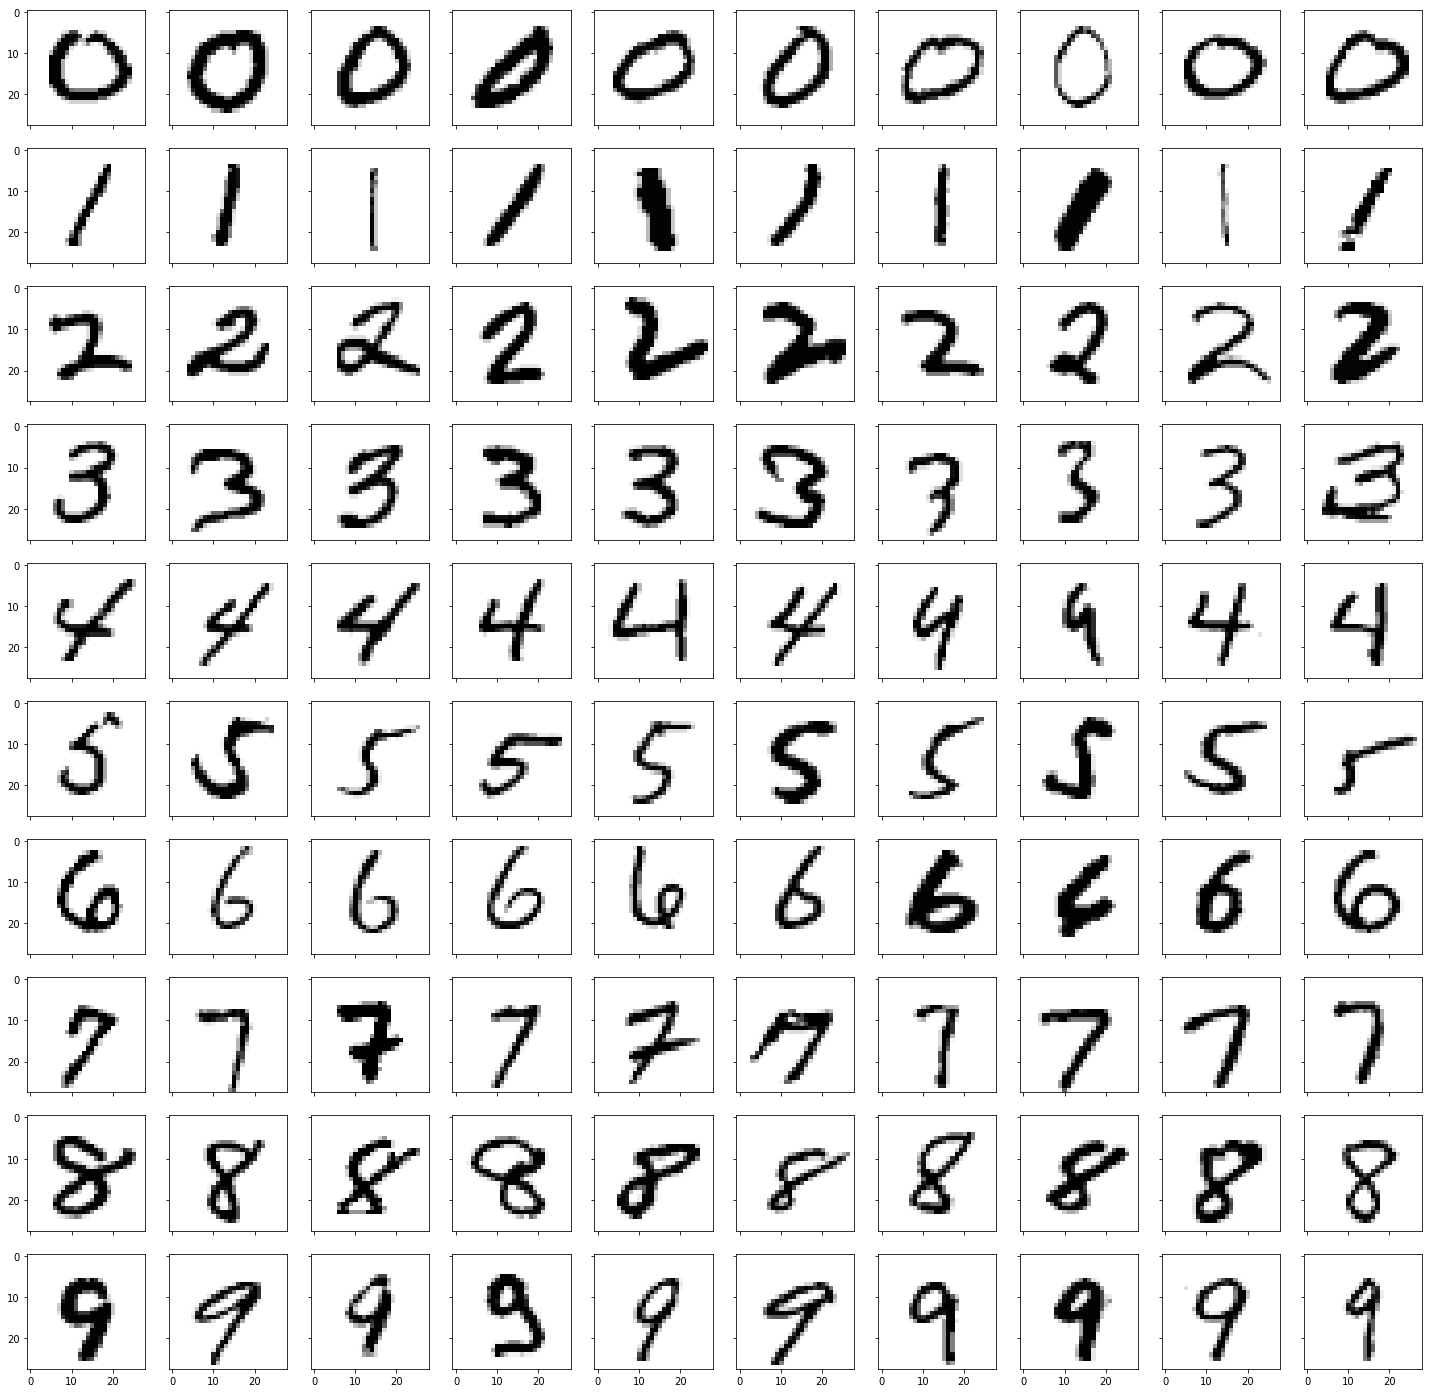

In [20]:
def P1(num_examples):
    
    #create a list of digits 0-9
    dig = [x for x in range(10)]
    
    #create empty list for individual digits sequences
    code = []
    
    #create list of lists so first index is list of all 0s, second list is a list of all 1s, etc
    code2 = []
    
    #loop through data set to group the occurences
    for j in dig: 
        for i in range(len(mini_train_data)):
            if int(mini_train_labels[i]) == j:
                code.append(mini_train_data[i])
        code2.append(code)
        code = []
    
    #convert to np array
    code3 = np.asarray(code2)
    
    #setup plots
    fig, ax = plt.subplots(len(dig),num_examples,sharex='col', sharey='row', figsize=(25, 25))
    ax = ax.ravel()

    plot_index1 = []
    
    #loop through data to create a index to be used for subplots
    for k in range(len(dig)):
        for m in range(num_examples):
             plot_index1.append(code3[k][m])
    
    # loop through plot index to greate plot grid 
    for i in range(len(plot_index1)):
        ax[i].imshow(plot_index1[i].reshape(28,28), cmap= "Greys")
        
    
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [21]:
def P2(k_values):

    ### STUDENT START ###

    #setup of scikit learn classifer. 
    model = KNeighborsClassifier(n_neighbors = k_values)
    model.fit(mini_train_data, mini_train_labels)
    predicted_labels = model.predict(dev_data)

    #setup a list of instances where the training label is misclassified from the predicted labels
    i=0
    x=[]
    while i< len(mini_train_labels):
        if dev_labels[i] != predicted_labels[i]:
            x.append(dev_labels[i])
        i+=1
    
    #convert the list to a numpy array to determine unique counts per digit and convert to a dictionary
    x = np.asarray(x)
    np.unique(x)
    digit, count = np.unique(x, return_counts=True)
    mis = dict(zip(digit, count))
    
    #loop through the dictionary to find the max value of occurences for that max digit
    max_count = 0
    max_digit = ''
    for digit,count in mis.items():
        if count > max_count:
            max_count = count
            max_digit = digit
    
    
    print("K-Value: ", k_values)
    print("Total labels: ", len(dev_labels))
    print("Total correctly predicted: ", sum(predicted_labels==dev_labels))
    print("Accuracy: ", (sum(predicted_labels==dev_labels)/len(dev_labels)))
    print("Number count of misclassified individual digits: ", mis)
    print("The digit ", max_digit, "was the highest amount misclassified at", max_count, "times.")
   
    #use the classification report 
    print("Precision Report: \n", classification_report(dev_labels, predicted_labels))



### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
for i in k_values:
    P2(i)

K-Value:  1
Total labels:  1000
Total correctly predicted:  888
Accuracy:  0.888
Number count of misclassified individual digits:  {0.0: 2, 2.0: 21, 3.0: 11, 4.0: 19, 5.0: 15, 6.0: 4, 7.0: 9, 8.0: 12, 9.0: 19}
The digit  2.0 was the highest amount misclassified at 21 times.
Precision Report: 
              precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

K-Value:  3
Total labels:  1000
Total correctly predicted:  878
Ac

ANSWER: the digit 2 is the most misclassified digit when k=1. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [22]:

def P3(train_sizes):

### STUDENT START ###
    global accuracies
    
    #set start time 
    start = time.time()
    
    #set new training data levels 
    train_data, train_labels = X[:train_sizes], Y[:train_sizes]

    #setup of scikit learn classifer. 
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(train_data, train_labels)
    predicted_labels = model.predict(dev_data)
    
    
    print("Training size: ", len(train_data))
    print("Dev set size: ", len(dev_labels))
    print("Total correctly predicted: ", sum(predicted_labels==dev_labels))
    print("Accuracy: ", (sum(predicted_labels==dev_labels)/len(dev_labels)))
    print("Run time: %s seconds" % (time.time() - start))
    print("\n")
    
    #append accuracies list
    accuracies.append(sum(predicted_labels==dev_labels)/len(dev_labels))

    ### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []


for train in train_sizes:
    P3(train)



Training size:  100
Dev set size:  1000
Total correctly predicted:  720
Accuracy:  0.72
Run time: 0.12072920799255371 seconds


Training size:  200
Dev set size:  1000
Total correctly predicted:  786
Accuracy:  0.786
Run time: 0.21743202209472656 seconds


Training size:  400
Dev set size:  1000
Total correctly predicted:  841
Accuracy:  0.841
Run time: 0.443631649017334 seconds


Training size:  800
Dev set size:  1000
Total correctly predicted:  884
Accuracy:  0.884
Run time: 0.9199638366699219 seconds


Training size:  1600
Dev set size:  1000
Total correctly predicted:  902
Accuracy:  0.902
Run time: 1.8521831035614014 seconds


Training size:  3200
Dev set size:  1000
Total correctly predicted:  926
Accuracy:  0.926
Run time: 3.689570188522339 seconds


Training size:  6400
Dev set size:  1000
Total correctly predicted:  937
Accuracy:  0.937
Run time: 7.450799942016602 seconds


Training size:  12800
Dev set size:  1000
Total correctly predicted:  959
Accuracy:  0.959
Run time: 15

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

The predicted accuracy value for n=60,000 is:  [[ 1.24307226]]


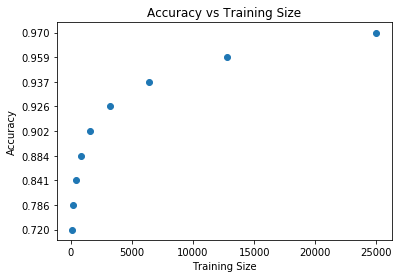

In [23]:
def P4():

    ### STUDENT START ###
   
    #reformat accuracies list to 3 decimal places 
    accuracies2 = [ '%.3f' % i for i in accuracies ]
  
    #convert to numpy arrays and reshape to fit the function
    accuracies3= np.asarray(accuracies2)
    train_sizes2 = np.asarray(train_sizes)
    accuracies3 = accuracies3.reshape(-1,1)
    train_sizes2 = train_sizes2.reshape(-1,1)
    
    #create linear regression model 
    model = LinearRegression()
    model.fit(train_sizes2, accuracies3)
    predict_y = model.predict(60000)
    print("The predicted accuracy value for n=60,000 is: ", predict_y)
    
    
    #print scatter plot to get a visualization 
    plt.scatter(train_sizes, accuracies3)
    plt.ylabel("Accuracy")
    plt.xlabel("Training Size")
    plt.title("Accuracy vs Training Size")


   
    ### STUDENT END ###

P4()

ANSWER: The predicted value for n=60000 is 1.243 which is greater than one and thus impossible. Based on the scatter plot, we can see that the curve is logarithmic. In order to get an accurate prediction, the model would need to be converted from a linear model into a logarithmic model so that it correctly predicts the value. 

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Training size:  1000
Total labels:  1000
Total correctly predicted:  888
Accuracy:  0.888


Confusion Matrix: 
 [[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


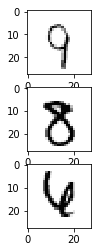

In [24]:
def P5():

 ### STUDENT START ###

    #setup of scikit learn classifer  
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(mini_train_data, mini_train_labels)
    predicted_labels = model.predict(dev_data)    
               
    #setup a list of instances where the training label is misclassified from the predicted labels
    i=0
    x=[]
    index = []
    while i< len(dev_labels):
        if dev_labels[i] != predicted_labels[i]:
            x.append(dev_labels[i])
            index.append(i)
        i+=1
 
    
    print("Training size: ", len(mini_train_data))
    print("Total labels: ", len(dev_labels))
    print("Total correctly predicted: ", sum(predicted_labels==dev_labels))
    print("Accuracy: ", (sum(predicted_labels==dev_labels)/len(dev_labels)))
    print("\n")
    print("Confusion Matrix: \n",confusion_matrix(dev_labels, predicted_labels))
    
    
    #examples of mis-classified digits
    dev_data2 = dev_data.reshape(1000,28,28)

    plt.figure(1)
    plt.subplot(3,1,1)
    plt.imshow(dev_data2[index[0]], cmap = 'Greys')

    plt.subplot(3,1,2)
    plt.imshow(dev_data2[index[1]], cmap = 'Greys')
    
    plt.subplot(3,1,3)
    plt.imshow(dev_data2[index[2]], cmap = 'Greys')
    
    plt.show()



    ### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Gaussian filter applied to training data:  0.866
Gaussian filter applied to dev data:  0.839
Gaussian filter applied to both training & dev data:  0.819
Visual example of blurring:


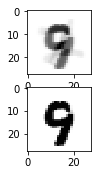

In [25]:
from scipy.ndimage.filters import gaussian_filter

def P6():
    
### STUDENT START ###

    #set sigma for filter and apply gaussian_filter to training and dev data sets
    sigma = 0.6
    g_filt_train = gaussian_filter((mini_train_data), sigma = sigma)
    g_filt_dev = gaussian_filter((dev_data), sigma = sigma)

    
    #setup of scikit learn classifer  
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(g_filt_train, mini_train_labels)
    
    model2 = KNeighborsClassifier(n_neighbors = 1)
    model2.fit(mini_train_data, mini_train_labels)

    
    print("Gaussian filter applied to training data: ", model.score(dev_data, dev_labels))
    print("Gaussian filter applied to dev data: ", model2.score(g_filt_dev, dev_labels))
    print("Gaussian filter applied to both training & dev data: ", model.score(g_filt_dev, dev_labels))

    
    print("Visual example of blurring:")
    plt.figure(1)
    plt.subplot(3,1,1)
    plt.imshow(g_filt_train[1].reshape(28,28), cmap = 'Greys')
    plt.subplot(3,1,2)
    plt.imshow(mini_train_data[1].reshape(28,28), cmap = 'Greys')
    
    
    

### STUDENT END ###

P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [26]:
def P7():

### STUDENT START ###

    #create function to convert to binary
    def binarize(data, thresholds=[0.5]):
        
        #create empty array
        binarized = np.zeros(data.shape)
        
        #loop through all values of the array
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] > thresholds:
                    binarized[i,j] = 1
                else:
                    binarized[i,j] = 0
        return binarized
    
    
    #create function for multinomial
    def multinomial(data, thresholds=[(1/3), (2/3)]):

        #create empty array
        binarized = np.zeros(data.shape)

        #loop through all values of the array
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] < thresholds[0]:
                    binarized[i,j] = 0
                if thresholds[0] <= data[i,j] <thresholds[1] :
                    binarized[i,j] = 1
                if data[i,j] >= thresholds[1]:
                    binarized[i,j] = 2
        return binarized
    
    #create binarized data sets
    b_mini_train_data = binarize(mini_train_data)
    b_dev_data = binarize(dev_data)
    
    #create multinomial data sets
    m_mini_train_data = multinomial(mini_train_data)
    m_dev_data = multinomial(dev_data)
    
    #create bernoulli classifier
    bern = BernoulliNB(alpha=1)
    bern.fit(b_mini_train_data, mini_train_labels)
    print("BernoulliNP accuracy: ", bern.score(dev_data, dev_labels))

    #crate multinomial classifier
    multi = MultinomialNB()
    multi.fit(m_mini_train_data, mini_train_labels)
    print("MultinomialNB accuracy: ", multi.score(dev_data, dev_labels))

    
### STUDENT END ###

P7()

BernoulliNP accuracy:  0.796
MultinomialNB accuracy:  0.798


ANSWER: The multinomialNB classifier is slightly more accurate (0.798 vs 0.796). This makes sense because when you began to tranche the data into more buckets then it has a chance of becoming more accurate. As the number of buckets increase then so should the accuracy. 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [27]:
def P8():

### STUDENT START ###

    #create function to convert to binary
    def binarize(data, thresholds=[0.5]):
        
        #create empty array
        binarized = np.zeros(data.shape)
        
        #loop through all values of the array
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] > thresholds:
                    binarized[i,j] = 1
                else:
                    binarized[i,j] = 0
        return binarized
    
    #create binarized data sets
    b_mini_train_data = binarize(mini_train_data)
    b_dev_data = binarize(dev_data)

    #create bernoulli classifier
    alphas = {'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    
    #setup of gridsearchCV
    parameters = GridSearchCV(BernoulliNB(), alphas, cv=5)
    parameters.fit(b_mini_train_data, mini_train_labels)
    print(parameters.grid_scores_)
    

    
    
### STUDENT END ###

P8()


/Users/ehsanyousefzadeh/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/ehsanyousefzadeh/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/ehsanyousefzadeh/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/ehsanyousefzadeh/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/ehsanyousefzadeh/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors

[mean: 0.81000, std: 0.02070, params: {'alpha': 0}, mean: 0.82000, std: 0.02494, params: {'alpha': 0.0001}, mean: 0.81900, std: 0.02676, params: {'alpha': 0.001}, mean: 0.81900, std: 0.02668, params: {'alpha': 0.01}, mean: 0.81400, std: 0.02800, params: {'alpha': 0.1}, mean: 0.80600, std: 0.02232, params: {'alpha': 0.5}, mean: 0.80200, std: 0.02307, params: {'alpha': 1.0}, mean: 0.80000, std: 0.01915, params: {'alpha': 2.0}, mean: 0.74000, std: 0.02638, params: {'alpha': 10.0}]


ANSWER: The alpha value that has the highest score is alpha= 0.0001 which yields a scofe of 0.82. After attempting to run an alpha = 0, the gridsearchCV defaults to preset minimum alpha amount and thus giving an artificial high score. This default minimum alpha makes sense because for this data set you need to have some minimum amount of laplace smoothing or else the values that have a probability of 0 will thus make the entire probability 0 because of multiplication. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [28]:
def P9():

### STUDENT END ###
    
    #crate multinomial classifier
    gaussian = GaussianNB()
    gaussian.fit(mini_train_data, mini_train_labels)
    
    #make adjustments to the sigma
    gaussian.sigma_ = np.full((10,784), 1)

    
    print("Gaussian accuracy: ", gaussian.score(dev_data, dev_labels))
   

### STUDENT END ###

gnb = P9()


Gaussian accuracy:  0.802


ANSWER: by reducing the sigma (variance) of the normal distribution, you can effectively fit our values to a curve that is much tighter. by having a defauly high variance, the gaussian distribution becomes too flat and does not fit our data well. Setting the sigma to a value of 1 fits the distrubtion accurately. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

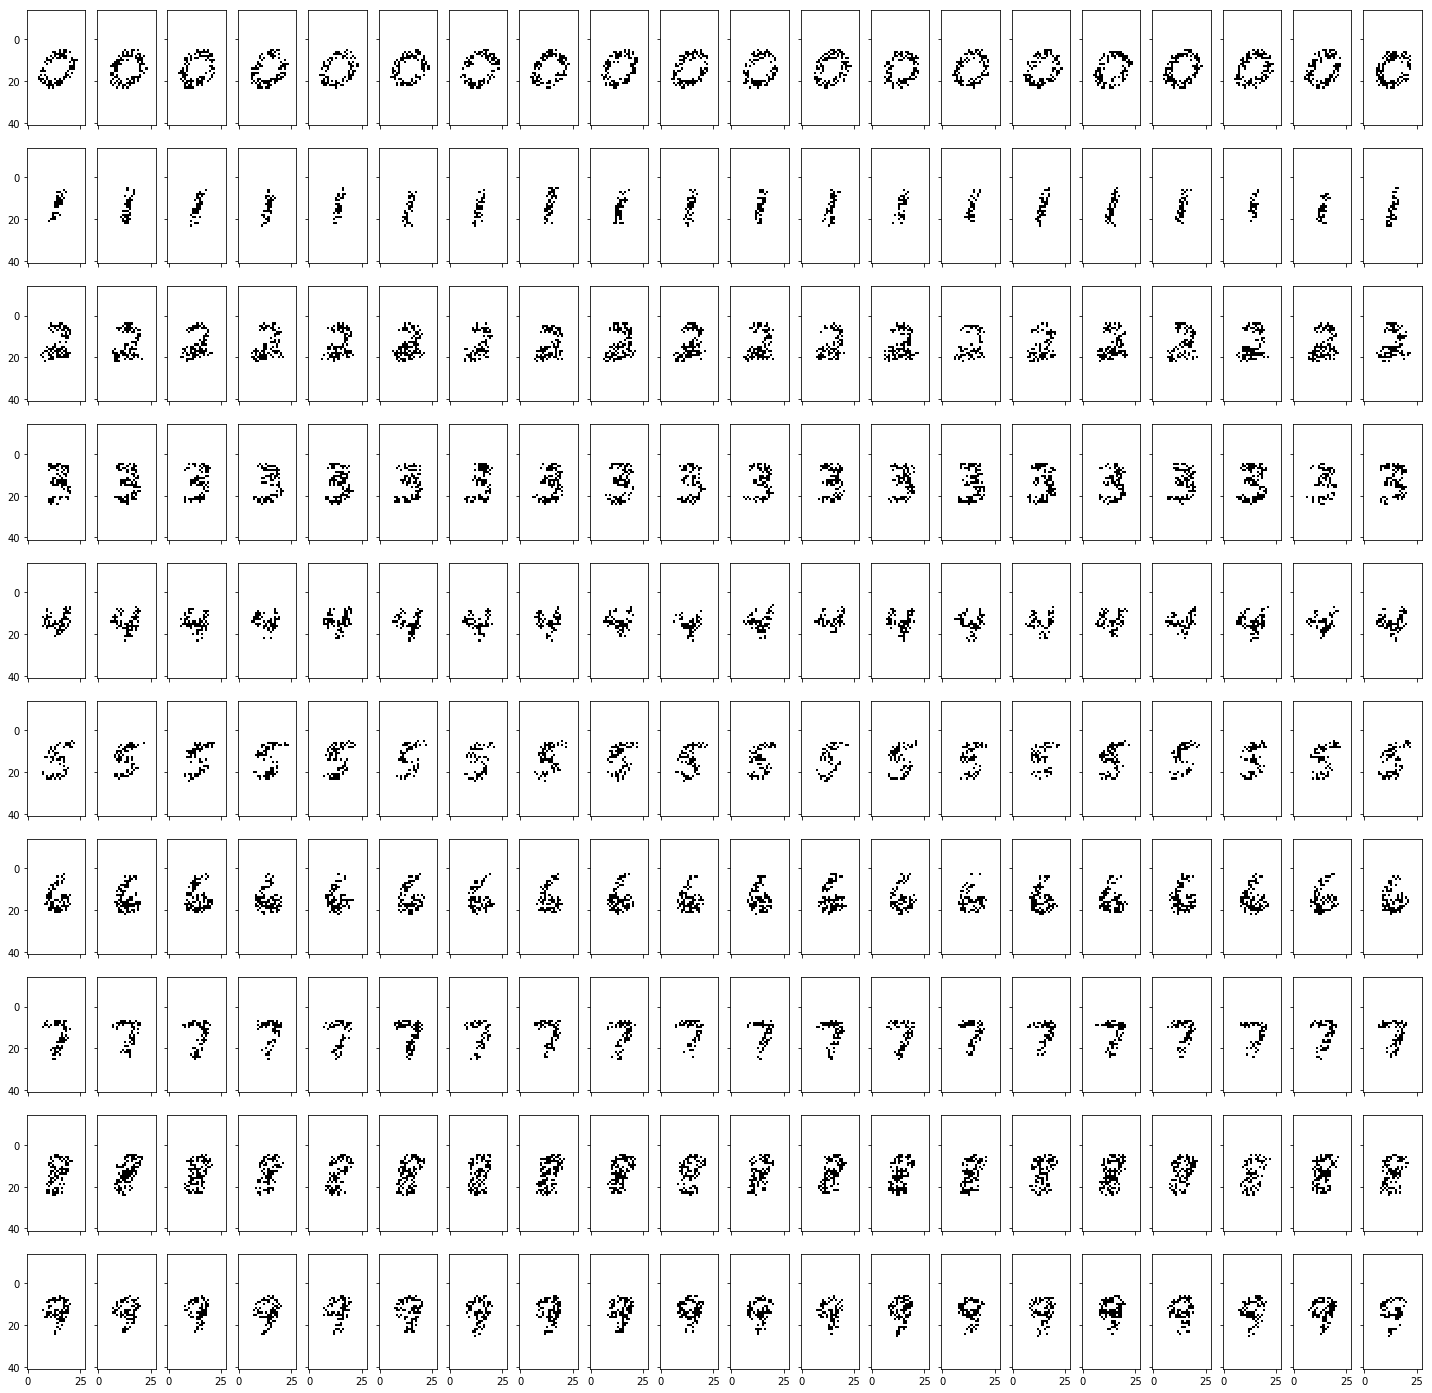

In [29]:
def P10(num_examples):

### STUDENT START ###
    
    #create function to convert to binary
    def binarize(data, thresholds=[0.3]):
        
        #create empty array
        binarized = np.zeros(data.shape)
        
        #loop through all values of the array to binarize
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] > thresholds:
                    binarized[i,j] = 1
                else:
                    binarized[i,j] = 0
        return binarized
    
    #create binarized data sets
    b_mini_train_data = binarize(mini_train_data)
    b_dev_data = binarize(dev_data)

        
    #create bernoulli classifier
    bern = BernoulliNB(alpha=1)
    bern.fit(b_mini_train_data, mini_train_labels)
    
#     prob_v = []
#     for i in range(10):
#         val = bern.feature_log_prob_[i]
#         val_exp = np.exp(val)
#         val_random = val_exp*(np.random.rand(1,784))
#         val_binarize = binarize(val_random)
#         prob_v.append(val_binarize)
    
    #determine the probability of the feature and convert log value
    zero = bern.feature_log_prob_[0]
    zero_exp = np.exp(zero)
    
    #randomize the digit --> probability of classified digit times the probability of the of random distribution
    random_zero = zero_exp*(np.random.rand(1,784))

    #binarize the example 
    b_random_zero = binarize(random_zero)

    #setup plots
    fig, ax = plt.subplots(10,num_examples,sharex='col', sharey='row', figsize=(25, 25))
    ax = ax.ravel()
    
    #create empty list for index of sub plots 
    plot_index = []
    
    #loop through range of digits and num examples to do the following:
    # 1) get the log_prob of each instance
    # 2) get the exp of the log prob to conver back to normal
    # 3) get random distribution and multiply it by the probabilities
    # 4) binarize the data set and append to plot index 
    for k in range(10):
        for m in range(num_examples):
            val = bern.feature_log_prob_[k]
            val_exp = np.exp(val)
            val_random = val_exp*(np.random.rand(1,784))
            val_binarize = binarize(val_random)
            
            plot_index.append(val_binarize)
    
    # loop through plot index to greate plot grid 
    for i in range(len(plot_index)):
        ax[i].imshow(plot_index[i].reshape(28,28), cmap= "Greys")


### STUDENT END ###

P10(20)


ANSWER: The generated digits appear very similar to one another. The training digits have much more variance and range of single digit examples. You need to try hard to notice subtle difference in the generated examples. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [30]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    #create function to convert to binary
    def binarize(data, thresholds=[0.3]):
        
        #create empty array
        binarized = np.zeros(data.shape)
        
        #loop through all values of the array
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] > thresholds:
                    binarized[i,j] = 1
                else:
                    binarized[i,j] = 0
        return binarized
    
    #create binarized data sets
    b_mini_train_data = binarize(mini_train_data)
    b_dev_data = binarize(dev_data)

        
    #create bernoulli classifier
    bern = BernoulliNB(alpha=1)
    bern.fit(b_mini_train_data, mini_train_labels)
    
    #predicted model
    predicted = bern.predict(b_dev_data)
    
    #create object of all probabilities for dev data 
    prob = bern.predict_proba(b_dev_data)

    #create list of probabilities for digit value
    p=[]
    for i in range(len(dev_labels)):
        p.append(prob[i][int(dev_labels[i])])
    
    buckets = [0]+buckets

    #loop through all buckets
    for b in range(len(buckets)):
        correct_count = 0
        total_count = 0
        
        #loop through p list of probabilities 
        for i in range(len(p)):
            if buckets[b]< p[i] <= buckets[b+1]:

                #if correctly classified then increase correct count
                if dev_labels[i]==predicted[i]:
                    correct_count += 1
                    total_count += 1
                
                #if incorrectly classified then do not increase correct count 
                if dev_labels[i]!=predicted[i]:
                    total_count += 1
            else:
                continue 
                
            
            #append correct and total values for each bucket
            correct[buckets.index(buckets[b])] = correct_count
            total[buckets.index(buckets[b])] = total_count
        
        
### STUDENT END ###
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
   accuracy = 0.0
   if (total[i] > 0): accuracy = correct[i] / total[i]
   print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))       

p(pred) <= 0.5000000000000    total = 182    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  17    accuracy = 1.000
p(pred) <= 0.9990000000000    total =  34    accuracy = 1.000
p(pred) <= 0.9999900000000    total =  48    accuracy = 1.000
p(pred) <= 0.9999999000000    total =  49    accuracy = 1.000
p(pred) <= 0.9999999990000    total =  58    accuracy = 1.000
p(pred) <= 0.9999999999900    total =  49    accuracy = 1.000
p(pred) <= 0.9999999999999    total =  73    accuracy = 1.000
p(pred) <= 1.0000000000000    total = 490    accuracy = 1.000


ANSWER: I would characterize this as a strongly calibrated classifier because there is a positive correlation between posterior probability and accuracy. All the posterior probabilities below 0.5 misclassified the digits. 

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [31]:
from scipy.ndimage import label

def P12():

### STUDENT START ###

    
    #create function to convert to binary
    def binarize(data, thresholds=[0.5]):
        
        #create empty array
        binarized = np.zeros(data.shape)
        
        #loop through all values of the array
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] > thresholds:
                    binarized[i,j] = 1
                else:
                    binarized[i,j] = 0
        return binarized

    
    #create binarized dev data sets
    
    b_dev_data = binarize(dev_data)
    
    
    #basic bernoulli
    b_mini_train_data = binarize(mini_train_data)
    bern = BernoulliNB(alpha=1)
    bern.fit(b_mini_train_data, mini_train_labels)
    print("BernoulliNP accuracy: ", bern.score(dev_data, dev_labels))
    
    #scalar multiplication to give extra weighting to non-zero pixels 
    mini_train_data_2 = mini_train_data*3
    b_mini_train_data_2 = binarize(mini_train_data_2)
    bern = BernoulliNB(alpha=1)
    bern.fit(b_mini_train_data_2, mini_train_labels)
    print("BernoulliNP accuracy with 3x scalar multiplication: ", bern.score(dev_data, dev_labels))
    
                       

### STUDENT END ###

P12()

BernoulliNP accuracy:  0.796
BernoulliNP accuracy with 3x scalar multiplication:  0.811
